In [34]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
import os
plt.rcParams["figure.figsize"] = [10, 10]

In [27]:
def named_frame(frame: cv2.typing.MatLike, number: int) -> cv2.typing.MatLike:
    named_frame = frame.copy()
    cv2.putText(
        named_frame,
        str(number),
        (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (255, 0, 0),
        2,
        cv2.LINE_AA,
    )
    return named_frame


avg_time = 0
video_path = "../../data/public/videos/footage.mp4"
start_time_in_seconds = 0

IS_PIXEL_MOVING_THRESHOLD = 50
AMOUNT_OF_MOVING_PIXELS_THRESHOLD = 20

cap = cv2.VideoCapture(video_path)
ret, previous_frame = cap.read()
prev_gray = cv2.cvtColor(previous_frame, cv2.COLOR_RGB2GRAY)
index = 0
while True:
    index += 1

    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    diff = np.abs(np.float32(gray) - np.float32(prev_gray))
    diff = np.uint8(diff)
    ret, diff_clear = cv2.threshold(diff, IS_PIXEL_MOVING_THRESHOLD, 255, cv2.THRESH_BINARY)
    diff_clear = cv2.medianBlur(diff_clear, 3)
    amount_of_moving_pixels = len(diff_clear[diff_clear > 0])

    cv2.imshow("Frame", named_frame(diff, index))
    key = cv2.waitKey(0) & 0xFF
    if key == ord("q"):
        break
    prev_gray = gray

cv2.destroyAllWindows()

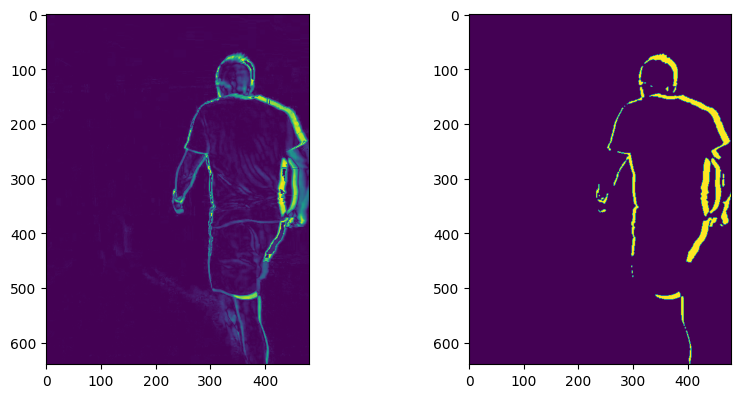

In [35]:
video_path = "../../data/public/videos/footage.mp4"
start_time_in_seconds = 0

IS_PIXEL_MOVING_THRESHOLD = 50
AMOUNT_OF_MOVING_PIXELS_THRESHOLD = 20

cap = cv2.VideoCapture(video_path)
ret, previous_frame = cap.read()
prev_gray = cv2.cvtColor(previous_frame, cv2.COLOR_RGB2GRAY)
index = 0
skip_until_frame = 50
plt_count = 0
while True:
    index += 1
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    diff = np.abs(np.float32(gray) - np.float32(prev_gray))
    diff = np.uint8(diff)
    ret, diff_clear = cv2.threshold(diff, IS_PIXEL_MOVING_THRESHOLD, 255, cv2.THRESH_BINARY)
    diff_clear = cv2.medianBlur(diff_clear, 3)
    amount_of_moving_pixels = len(diff_clear[diff_clear > 0])

    prev_gray = gray

    if index == 57:
        plt_count += 1
        plt.subplot(2, 2, 1)
        plt.imshow(np.clip(diff * 2, 0, 255))
        plt.subplot(2, 2, 2)
        plt.imshow(np.clip(diff_clear, 0, 255))

In [3]:
def moving_pixels(curr_frame: cv2.typing.MatLike, prev_frame: cv2.typing.MatLike):
    IS_PIXEL_MOVING_THRESHOLD = 50

    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_RGB2GRAY)
    curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_RGB2GRAY)
    # diff = cv2.subtract(gray, prev_gray)
    diff = np.abs(np.float32(curr_gray) - np.float32(prev_gray))
    diff = np.uint8(diff)
    ret, diff_clear = cv2.threshold(
        diff, IS_PIXEL_MOVING_THRESHOLD, 255, cv2.THRESH_BINARY
    )
    diff_clear = cv2.medianBlur(diff_clear, 3)
    return len(diff_clear[diff_clear > 0])

Ratio: 0.4798206278026906


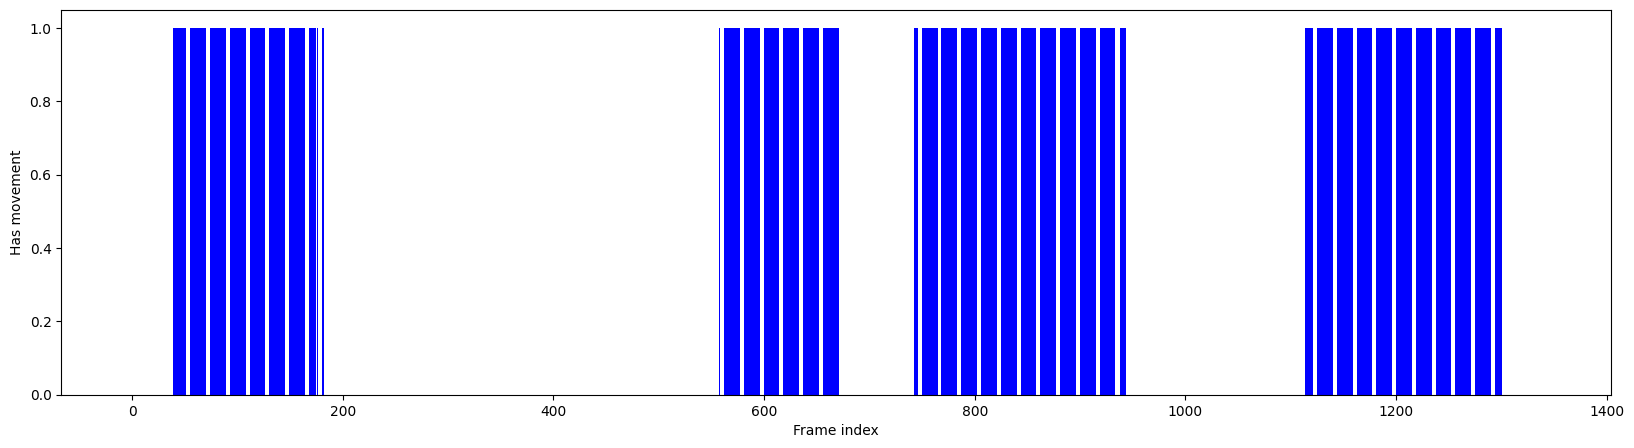

In [4]:
video_path = "../../data/public/videos/footage.mp4"

IS_PIXEL_MOVING_THRESHOLD = 50
AMOUNT_OF_MOVING_PIXELS_THRESHOLD = 20

video_time = 0
processing_time = 0

frame_indices = []
has_movement_vals = []

cap = cv2.VideoCapture(video_path)

current_frame_idx = 0
frame_indices.append(current_frame_idx)
has_movement_vals.append(False)
ret, previous_frame = cap.read()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    current_frame_idx += 1

    amount_of_moving_pixels = moving_pixels(frame, previous_frame)
    frame_indices.append(len(frame_indices))
    has_movement_vals.append(
        amount_of_moving_pixels > AMOUNT_OF_MOVING_PIXELS_THRESHOLD
    )

    previous_frame = frame

vals = np.array(has_movement_vals)
plt.figure(figsize=(20, 5))
plt.bar(frame_indices, has_movement_vals, color="blue")
plt.xlabel("Frame index")
plt.ylabel("Has movement")
print("Ratio:", len(vals[vals > 0]) / len(vals))